# Context

### Step 0: Package Installation & setup

In [1]:
# 1. Install nx-arangodb via pip
# Github: https://github.com/arangodb/nx-arangodb

!pip install nx-arangodb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 26.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.6/114.6 kB 8.8 MB/s eta 0:00:00
  Attempting uninstall: networkx
    Found existing installation: networkx 3.4.2
    Uninstalling networkx-3.4.2:
      Successfully uninstalled networkx-3.4.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torch 2.5.1+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is incompatible.
torch 2.5.1+cu124 requires nvidia-cuda-cupti-cu12==12.4.127; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cuda-cupti-cu12 12.5.82 which

In [2]:
# 2. Check if you have an NVIDIA GPU
# Note: If this returns "command not found", then GPU-based algorithms via cuGraph are unavailable

!nvidia-smi
!nvcc --version

Mon Mar 10 04:16:51 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   36C    P8              9W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# 3. Install nx-cugraph via pip
# Note: Only enable this installation if the step above is working!

%pip install nx-cugraph-cu12 --extra-index-url https://pypi.nvidia.com # Requires CUDA-capable GPU

Looking in indexes: https://pypi.org/simple, https://pypi.nvidia.com


In [ ]:
# 4. Install LangChain & LangGraph

%pip install --upgrade langchain langchain-community langchain-deepseek langgraph tree-sitter==0.21.3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 498.8/498.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 32.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 131.5/131.5 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 415.4/415.4 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.4/55.4 kB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.8/45.8 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 20.2 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.40
    Uninstalling langchain-core-0.3.40:
      Successfully uninstalled langchain-core-0.3.40
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.19
    Uninstalling langc

In [5]:
# 5. Import the required modules
import networkx as nx
import nx_arangodb as nxadb

from arango import ArangoClient

import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from random import randint
import re
import threading


from langgraph.prebuilt import create_react_agent
from langgraph.checkpoint.memory import MemorySaver
from langchain_openai import ChatOpenAI
from langchain_community.graphs import ArangoGraph
from langchain_community.chains.graph_qa.arangodb import ArangoGraphQAChain
from langchain_core.tools import tool

import os
import subprocess
from git import Repo
from tree_sitter import Language, Parser
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from langchain_deepseek import ChatDeepSeek

[04:17:41 +0000] [INFO]: NetworkX-cuGraph is available.
INFO:nx_arangodb:NetworkX-cuGraph is available.


In [ ]:
# 6. Connect to the ArangoDB database

db = ArangoClient(hosts="https://762f172f4012.arangodb.cloud:8529").db(username="root", password="YOURPASSWORD", verify=True)

print(db)

<StandardDatabase _system>


### Step 1: Choosing & preparing dataset for NetworkX

In [8]:
# 1. Download the dataset
# 2. Parse the repo to import into graph
# Clone the repo
def clone_repo(repo_url, repo_path="repo"):
    if not os.path.exists(repo_path):
        print(f"Cloning repository: {repo_url}")
        Repo.clone_from(repo_url, repo_path)
    else:
        print("Repository already exists. Skipping clone.")
    return repo_path

# Traverse through repo files
def traverse_files(repo_path, extensions=None):
    files = []
    for root, _, filenames in os.walk(repo_path):
        for filename in filenames:
            if extensions and not any(filename.endswith(ext) for ext in extensions):
                continue
            file_path = os.path.join(root, filename)
            files.append(file_path)
    return files

def traverse_tree(node):
    """Helper function to traverse all descendants of a node."""
    yield node
    for child in node.children:
        yield from traverse_tree(child)

# Setup Tree-sitter parser
def setup_tree_sitter():
    """Set up the tree-sitter parser for Python, avoiding redundant builds."""
    build_path = "build/my-languages.so"
    repo_path = "tree-sitter-repos/tree-sitter-python"

    # Check if the shared library already exists
    if not os.path.exists(build_path):
        print(f"Building Tree-sitter language library at {build_path}...")

        # Ensure the repository exists before building
        if not os.path.exists(repo_path):
            print("Cloning the Tree-sitter Python repository...")
            subprocess.run(["git", "clone", "https://github.com/tree-sitter/tree-sitter-python", repo_path], check=True)

        # Build the library
        Language.build_library(
            build_path,
            [repo_path]
        )
    else:
        print("Tree-sitter language library already exists. Skipping build.")

    return Language(build_path, "python")

# Initialize Tree-sitter
def load_tree_sitter():
    language = setup_tree_sitter()
    parser = Parser()
    parser.set_language(language)
    return parser

# Parse source code using Tree-sitter
def parse_code(file_path, parser):
    with open(file_path, "r", encoding="utf-8") as f:
        code = f.read()
    tree = parser.parse(bytes(code, "utf8"))
    return tree

def build_graph(files, parser):
    """Builds a directed graph representing the structure of the parsed files with metadata."""
    G = nx.DiGraph()
    global_vars = []
    class_methods = {}  # Track class methods for easier lookup

    # First pass: Collect class and method definitions
    for file in files:
        tree = parse_code(file, parser)
        root_node = tree.root_node
        for node in root_node.children:
            if node.type == "class_definition":
                class_name_node = node.child_by_field_name("name")
                if class_name_node:
                    class_name = class_name_node.text.decode("utf8")
                    # Store methods of this class
                    for class_child in node.children:
                        if class_child.type == "block":
                            for method in class_child.children:
                                if method.type == "function_definition":
                                    method_name_node = method.child_by_field_name("name")
                                    if method_name_node:
                                        method_name = method_name_node.text.decode("utf8")
                                        full_method_name = f"{class_name}.{method_name}"
                                        # Store class methods for lookup
                                        if class_name not in class_methods:
                                            class_methods[class_name] = []
                                        class_methods[class_name].append(method_name)

    # Second pass: Build the actual graph
    for file in files:
        tree = parse_code(file, parser)
        root_node = tree.root_node
        file_size = os.path.getsize(file)
        mod_time = os.path.getmtime(file)
        imports = extract_imports(root_node)
        # Add file node with metadata
        G.add_node(file, type="file", name=file, size=file_size, modification_time=mod_time, imports=imports)

        # Track import relationships between files
        imported_classes = {}
        for imp in imports:
            if imp.startswith("from "):
                parts = imp.split(" import ")
                if len(parts) == 2:
                    module_path = parts[0][5:]  # Remove "from "
                    imported_items = [item.strip() for item in parts[1].split(",")]
                    for item in imported_items:
                        imported_classes[item] = module_path

        for node in root_node.children:
            if node.type == "class_definition":
                process_class_definition(node, file, G, class_methods)
            elif node.type == "function_definition":
                process_function_definition(node, file, G, class_methods, imported_classes)
            elif node.type == "expression_statement":
                process_global_variable(node, file, G, global_vars)

    return G

def extract_imports(root_node):
    """Extracts import statements from the root node of a file."""
    return [node.text.decode("utf8") for node in root_node.children if node.type == "import_statement"]

def process_class_definition(node, file, G, class_methods):
    """Processes a class definition node and adds it to the graph."""
    class_name_node = node.child_by_field_name("name")
    if not class_name_node:
        return
    class_name = class_name_node.text.decode("utf8")
    docstring = extract_docstring(node)
    num_methods = sum(1 for n in node.children if n.type == "function_definition")
    inheritance = extract_inheritance(node)
    G.add_node(class_name, type="class", name=class_name, file=file, docstring=docstring, number_of_methods=num_methods, inheritance=inheritance)
    G.add_edge(file, class_name, relation="contains")

    # Process methods within the class
    for class_child in node.children:
        if class_child.type == "block":
            for method in class_child.children:
                if method.type == "function_definition":
                    process_method_definition(method, class_name, file, G, class_methods)


def extract_inheritance(node):
    """Extracts inheritance details if present."""
    base_class_node = node.child_by_field_name("superclass")
    return base_class_node.text.decode("utf8") if base_class_node else "None"

def extract_docstring(node):
    """Extracts the docstring of a class or function if present."""
    for child in node.children:
        if child.type == "string":
            return child.text.decode("utf8")
    return "No docstring"

def process_method_definition(node, class_name, file, G, class_methods):
    """Processes a method inside a class and adds it to the graph."""
    method_name_node = node.child_by_field_name("name")
    if not method_name_node:
        return
    method_name = method_name_node.text.decode("utf8")
    full_method_name = f"{class_name}.{method_name}"
    parameters = extract_parameters(node)
    return_type = extract_return_type(node)
    docstring = extract_docstring(node)
    G.add_node(full_method_name, type="method", name=full_method_name, file=file, class_=class_name, parameters=parameters, return_type=return_type, docstring=docstring)
    G.add_edge(class_name, full_method_name, relation="has_method")

    # Detect function calls within the method
    block = node.child_by_field_name("body")
    if block:
        instance_mapping = {"self": class_name}  # Map 'self' to the class name
        detect_function_calls(block, full_method_name, G, instance_mapping, class_methods)

def extract_parameters(node):
    """Extracts function parameters."""
    param_node = node.child_by_field_name("parameters")
    if not param_node:
        return []
    return [p.text.decode("utf8") for p in param_node.children if p.type == "identifier"]

def extract_return_type(node):
    """Extracts return type if annotated."""
    return_node = node.child_by_field_name("return_type")
    return return_node.text.decode("utf8") if return_node else "Unknown"

def process_function_definition(node, file, G, class_methods, imported_classes):
    """Processes a function definition and adds it to the graph."""
    func_name_node = node.child_by_field_name("name")
    if not func_name_node:
        return
    func_name = func_name_node.text.decode("utf8")
    parameters = extract_parameters(node)
    return_type = extract_return_type(node)
    docstring = extract_docstring(node)
    G.add_node(func_name, type="function", name=func_name, file=file, parameters=parameters, return_type=return_type, docstring=docstring)
    G.add_edge(file, func_name, relation="contains")

    # Process function body to detect class instantiations and method calls
    block = node.child_by_field_name("body")
    if block:
        instance_mapping = {}

        # First, find all class instantiations
        for descendant in traverse_tree(block):
            if descendant.type == "assignment":
                left = descendant.child_by_field_name("left")
                right = descendant.child_by_field_name("right")

                if left and right and right.type == "call":
                    var_name = left.text.decode("utf8")
                    call_func = right.child_by_field_name("function")

                    if call_func:
                        class_name = call_func.text.decode("utf8")
                        # Check if this is a class we know about (imported or defined)
                        if class_name in imported_classes or class_name in class_methods:
                            instance_mapping[var_name] = class_name

        # Then detect function calls with the instance mapping
        detect_function_calls(block, func_name, G, instance_mapping, class_methods)

def detect_class_instantiations(node, instance_mapping):
    """Detects variable assignments to class instances and stores the mapping."""
    for child in node.children:
        if child.type == "assignment":
            var_name_node = child.child_by_field_name("left")
            value_node = child.child_by_field_name("right")

            if var_name_node and value_node and value_node.type == "call":
                class_name_node = value_node.child_by_field_name("function")
                if class_name_node:
                    var_name = var_name_node.text.decode("utf8")
                    class_name = class_name_node.text.decode("utf8")
                    instance_mapping[var_name] = class_name  # Map instance variable to class


def detect_function_calls(node, caller, G, instance_mapping, class_methods):
    """Improved function to detect and resolve method calls including those on class instances."""
    for descendant in traverse_tree(node):
        if descendant.type == "call":
            call_func = descendant.child_by_field_name("function")
            if call_func:
                call_name = call_func.text.decode("utf8")
                resolved_call = call_name

                # If it's a method call on an instance (contains a dot)
                if "." in call_name:
                    instance_var, method_name = call_name.split(".", 1)

                    # If we have this instance in our mapping
                    if instance_var in instance_mapping:
                        class_name = instance_mapping[instance_var]

                        # Check if this method exists in the class
                        if class_name in class_methods and method_name in class_methods[class_name]:
                            resolved_call = f"{class_name}.{method_name}"

                # Add the edge showing the function call relationship
                call_line_number = descendant.start_point[0] + 1
                G.add_edge(caller, resolved_call, relation="calls", line_number=call_line_number)



def process_global_variable(node, file, G, global_vars):
    """Processes a global variable declaration and adds it to the graph."""
    for child in node.children:
        if child.type == "assignment":
            var_name_node = child.child_by_field_name("left")
            if var_name_node:
                var_name = var_name_node.text.decode("utf8")
                data_type = infer_data_type(child)
                G.add_node(var_name, type="variable", name=var_name, file=file, data_type=data_type)
                G.add_edge(file, var_name, relation="defines")
                global_vars.append(f"{var_name} in {file}")

def infer_data_type(assignment_node):
    """Infers the data type of a variable if possible."""
    value_node = assignment_node.child_by_field_name("right")
    if not value_node:
        return "Unknown"
    if value_node.type in ["string", "integer", "float", "boolean"]:
        return value_node.type
    return "Complex"


In [ ]:
# Main execution
repo_url = "https://github.com/educ8s/Python-Tetris-Game-Pygame"  # Replace with actual repo
repo_path = clone_repo(repo_url)
files = traverse_files(repo_path, extensions=[".py"])  # Modify extensions as needed
parser = load_tree_sitter()

Cloning repository: https://github.com/educ8s/Python-Tetris-Game-Pygame
Building Tree-sitter language library at build/my-languages.so...
Cloning the Tree-sitter Python repository...


/usr/local/lib/python3.11/dist-packages/tree_sitter/__init__.py:36: FutureWarning: Language.build_library is deprecated. Use the new bindings instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)
/usr/local/lib/python3.11/dist-packages/tree_sitter/__init__.py:36: FutureWarning: Language(path, name) is deprecated. Use Language(ptr, name) instead.
  warn("{} is deprecated. Use {} instead.".format(old, new), FutureWarning)


### Step 2: Convert and Load Graph Data into NetworkX

In [10]:
# 1. Load the dataset a NetworkX Graph
# Reference: https://networkx.org/documentation/stable/reference/generated/networkx.convert_matrix.from_pandas_edgelist.html

G = build_graph(files, parser)

# Visualize graph
print(files)
print(G)
print("Nodes:", G.nodes(data=True))
print("Edges:", G.edges(data=True))

['repo/game.py', 'repo/block.py', 'repo/position.py', 'repo/grid.py', 'repo/colors.py', 'repo/main.py', 'repo/blocks.py']
DiGraph with 93 nodes and 168 edges
Nodes: [('repo/game.py', {'type': 'file', 'name': 'repo/game.py', 'size': 3018, 'modification_time': 1741580408.566326, 'imports': ['import random', 'import pygame']}), ('Game', {'type': 'class', 'name': 'Game', 'file': 'repo/game.py', 'docstring': 'No docstring', 'number_of_methods': 0, 'inheritance': 'None'}), ('Game.__init__', {'type': 'method', 'name': 'Game.__init__', 'file': 'repo/game.py', 'class_': 'Game', 'parameters': ['self'], 'return_type': 'Unknown', 'docstring': 'No docstring'}), ('Grid', {'type': 'class', 'name': 'Grid', 'file': 'repo/grid.py', 'docstring': 'No docstring', 'number_of_methods': 0, 'inheritance': 'None'}), ('IBlock', {'type': 'class', 'name': 'IBlock', 'file': 'repo/blocks.py', 'docstring': 'No docstring', 'number_of_methods': 0, 'inheritance': 'None'}), ('JBlock', {'type': 'class', 'name': 'JBlock', 

In [11]:
# 2. Print the degree of one of the nodes

print(G.degree('repo/main.py'))

10


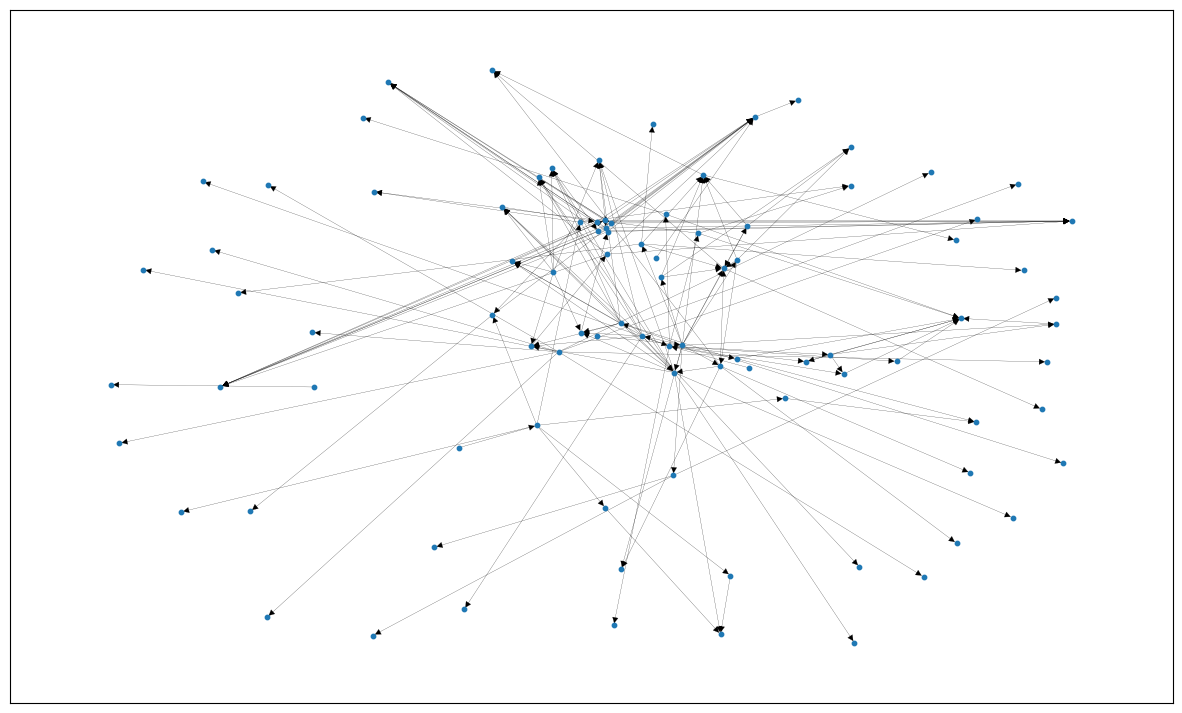

In [12]:
# 3. Visualize the Graph

plot_options = {"node_size": 10, "with_labels": False, "width": 0.15}
pos = nx.spring_layout(G, iterations=15, seed=1721)
fig, ax = plt.subplots(figsize=(15, 9))
nx.draw_networkx(G, pos=pos, ax=ax, **plot_options)

In [13]:
def visualize_graph_3d(G):
    pos = nx.spring_layout(G, dim=3, seed=42)  # Generate 3D positions

    # Extract edge positions and midpoint labels
    edge_x, edge_y, edge_z = [], [], []
    annotations = []

    for edge in G.edges():
        x0, y0, z0 = pos[edge[0]]
        x1, y1, z1 = pos[edge[1]]

        # Edge lines
        edge_x.extend([x0, x1, None])
        edge_y.extend([y0, y1, None])
        edge_z.extend([z0, z1, None])

        # Midpoint of edge for labeling
        mid_x, mid_y, mid_z = (x0 + x1) / 2, (y0 + y1) / 2, (z0 + z1) / 2
        relation = G[edge[0]][edge[1]].get("relation", "")

        # Store annotation text
        annotations.append(dict(
            x=mid_x, y=mid_y, z=mid_z,
            text=relation,
            showarrow=False,
            font=dict(size=10, color="black")
        ))

    # Edge lines trace
    edge_trace = go.Scatter3d(
        x=edge_x, y=edge_y, z=edge_z,
        line=dict(width=2, color='gray'),
        hoverinfo='none',
        mode='lines'
    )

    # Extract node positions
    node_x, node_y, node_z = [], [], []
    node_text = []
    node_colors = {
        "file": "blue",
        "class": "green",
        "method": "orange",
        "function": "red",
        "variable": "purple"
    }
    node_types = nx.get_node_attributes(G, "type")

    for node in G.nodes():
        x, y, z = pos[node]
        node_x.append(x)
        node_y.append(y)
        node_z.append(z)
        node_text.append(f"{node} ({node_types.get(node, 'unknown')})")

    # Node trace
    node_trace = go.Scatter3d(
        x=node_x, y=node_y, z=node_z,
        mode='markers+text',
        marker=dict(
            size=8,
            color=[node_colors.get(node_types.get(n, "gray"), "gray") for n in G.nodes()],
            opacity=0.8
        ),
        text=node_text,
        hoverinfo='text'
    )

    # Create figure
    fig = go.Figure(data=[edge_trace, node_trace])

    # Add edge labels as annotations
    for ann in annotations:
        fig.add_trace(go.Scatter3d(
            x=[ann["x"]], y=[ann["y"]], z=[ann["z"]],
            mode='text',
            text=[ann["text"]],
            hoverinfo='text',
            textfont=dict(size=10, color="black")
        ))

    fig.update_layout(
        title="3D Code Structure Graph",
        showlegend=False,
        scene=dict(
            xaxis=dict(visible=False),
            yaxis=dict(visible=False),
            zaxis=dict(visible=False)
        )
    )

    fig.show()


In [14]:
# Visualiza the graph in 3d
visualize_graph_3d(G)

### Step 3: Persist the Graph in ArangoDB

In [ ]:
# 1. Load the NetworkX Graph into ArangoDB

G_adb = nxadb.DiGraph(
    name="github",
    db=db,
    incoming_graph_data=G,
    write_batch_size=50000, # feel free to modify
    overwrite_graph=True,
)
print(G_adb)

[04:21:09 +0000] [INFO]: Overwriting graph 'github'
INFO:nx_arangodb:Overwriting graph 'github'
[04:21:11 +0000] [INFO]: Graph 'github' exists.
INFO:nx_arangodb:Graph 'github' exists.
[04:21:11 +0000] [INFO]: Default node type set to 'github_node'
INFO:nx_arangodb:Default node type set to 'github_node'
[2025/03/10 04:21:11 +0000] [1410] [INFO] - adbnx_adapter: Instantiated ADBNX_Adapter with database '_system'
INFO:adbnx_adapter:Instantiated ADBNX_Adapter with database '_system'


Output()

Output()

[2025/03/10 04:21:12 +0000] [1410] [INFO] - adbnx_adapter: Created ArangoDB 'github' Graph
INFO:adbnx_adapter:Created ArangoDB 'github' Graph


DiGraph named 'github' with 93 nodes and 168 edges


In [16]:
# 2. Re-connect to the same Graph

G_adb = nxadb.DiGraph(name="github", db=db)

print(G_adb)

[04:21:17 +0000] [INFO]: Graph 'github' exists.
INFO:nx_arangodb:Graph 'github' exists.
[04:21:17 +0000] [INFO]: Default node type set to 'github_node'
INFO:nx_arangodb:Default node type set to 'github_node'


DiGraph named 'github' with 93 nodes and 168 edges


In [17]:
# 3. Print the degree of a Node

G_adb.degree('github_node/45')

1

In [ ]:
# 4. Query the Graph

# Sample 3 nodes
result = G_adb.query("""
    FOR node IN github_node
        SORT RAND()
        LIMIT 3
        RETURN node
""")

print(list(result))
print('-'*10)

# Sample 3 edges
result = G_adb.query("""
    FOR edge IN github_node_to_github_node
        SORT RAND()
        LIMIT 3
        RETURN edge
""")

print(list(result))
print('-'*10)

# Traverse a node's 1-hop neighborhood
result = G_adb.query("""
    FOR node, edge, path IN 1..1 ANY 'github_node/1' GRAPH github
        LIMIT 1
        RETURN path
""")

print(list(result))

result = G_adb.query("""
    WITH github_node
    FOR node IN github_node
        FILTER node.type == "method" && node.name LIKE "Game.%"
        RETURN node
""")

print(list(result))


[{'_key': '0', '_id': 'github_node/0', '_rev': '_jV3HBsm---', 'type': 'file', 'name': 'repo/game.py', 'size': 3018, 'modification_time': 1741580408.566326, 'imports': ['import random', 'import pygame']}, {'_key': '91', '_id': 'github_node/91', '_rev': '_jV3HBsm-_a', 'type': 'method', 'name': 'TBlock.__init__', 'file': 'repo/blocks.py', 'class_': 'TBlock', 'parameters': ['self'], 'return_type': 'Unknown', 'docstring': 'No docstring'}, {'_key': '74', '_id': 'github_node/74', '_rev': '_jV3HBsm-_J', 'type': 'variable', 'name': 'next_surface', 'file': 'repo/main.py', 'data_type': 'Complex'}]
----------
[{'_key': '78', '_id': 'github_node_to_github_node/78', '_from': 'github_node/29', '_to': 'github_node/9', '_rev': '_jV3HByq--5', 'relation': 'calls', 'line_number': 67}, {'_key': '76', '_id': 'github_node_to_github_node/76', '_from': 'github_node/29', '_to': 'github_node/7', '_rev': '_jV3HByq--3', 'relation': 'calls', 'line_number': 67}, {'_key': '137', '_id': 'github_node_to_github_node/137

In [19]:
from arango import ArangoClient
import networkx as nx
import plotly.graph_objects as go

def visualize_arangodb_graph_3d(db, graph_name):
    # Fetch the ArangoDB graph
    graph = db.graph(graph_name)

    # Create a NetworkX graph
    G = nx.Graph()

    # Add nodes from all vertex collections
    for vertex_collection_name in graph.vertex_collections():
        collection = db.collection(vertex_collection_name)
        for vertex in collection.all():
            # Extract attributes (excluding system fields like '_key', '_id', etc.)
            attrs = {k: v for k, v in vertex.items() if k not in ['_id', '_rev', '_key']}
            G.add_node(vertex['_key'], **attrs)

    # Add edges from all edge collections
    for edge_definition in graph.edge_definitions():
        edge_collection_name = edge_definition['edge_collection']
        collection = db.collection(edge_collection_name)
        for edge in collection.all():
            # Extract '_from' and '_to' keys (format: "collection/key")
            from_key = edge['_from'].split('/')[-1]
            to_key = edge['_to'].split('/')[-1]
            # Extract edge attributes (excluding system fields)
            attrs = {k: v for k, v in edge.items() if k not in ['_id', '_rev', '_key', '_from', '_to']}
            G.add_edge(from_key, to_key, **attrs)

    # Generate 3D positions using NetworkX
    visualize_graph_3d(G)


In [20]:
visualize_arangodb_graph_3d(db, 'github')

In [21]:
# 5. Experimenting with different node keys

print(G_adb.nodes[1])
print(G_adb.nodes["1"])
print(G_adb.nodes["github_node/1"])

print('----')

print(G_adb[0][1])
print(G_adb["0"][1])
print(G_adb["github_node/0"][1])

{'_key': '1', '_id': 'github_node/1', 'type': 'class', 'name': 'Game', 'file': 'repo/game.py', 'docstring': 'No docstring', 'number_of_methods': 0, 'inheritance': 'None'}
{'_key': '1', '_id': 'github_node/1', 'type': 'class', 'name': 'Game', 'file': 'repo/game.py', 'docstring': 'No docstring', 'number_of_methods': 0, 'inheritance': 'None'}
{'_key': '1', '_id': 'github_node/1', 'type': 'class', 'name': 'Game', 'file': 'repo/game.py', 'docstring': 'No docstring', 'number_of_methods': 0, 'inheritance': 'None'}
----
{'_from': 'github_node/0', '_id': 'github_node_to_github_node/0', '_key': '0', '_to': 'github_node/1', 'relation': 'contains'}
{'_from': 'github_node/0', '_id': 'github_node_to_github_node/0', '_key': '0', '_to': 'github_node/1', 'relation': 'contains'}
{'_from': 'github_node/0', '_id': 'github_node_to_github_node/0', '_key': '0', '_to': 'github_node/1', 'relation': 'contains'}


### Step 4: Build the Agentic App with LangChain & LangGraph

In [ ]:
# 1. Create the ArangoGraph LangChain wrapper

arango_graph = ArangoGraph(db)

In [ ]:
# 2. Define the llm object
# Note: You can use any llm you want. I will be using DeepSeek for example.

os.environ['DEEPSEEK_API_KEY'] ='APIKEY'

llm = ChatDeepSeek(
    model="deepseek-chat",
    temperature=0
)

llm.invoke("hello!")

AIMessage(content='Hello! How can I assist you today? 😊', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 5, 'total_tokens': 16, 'completion_tokens_details': None, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}, 'prompt_cache_hit_tokens': 0, 'prompt_cache_miss_tokens': 5}, 'model_name': 'deepseek-chat', 'system_fingerprint': 'fp_3a5770e1b4_prod0225', 'finish_reason': 'stop', 'logprobs': None}, id='run-d502119e-650f-43bd-8786-bb2fd9103bb7-0', usage_metadata={'input_tokens': 5, 'output_tokens': 11, 'total_tokens': 16, 'input_token_details': {'cache_read': 0}, 'output_token_details': {}})

In [ ]:
class TimeoutError(Exception):
    """Custom timeout exception"""
    pass

def execute_with_timeout(func, timeout=30):
    """Executes a function with a timeout using threading.Timer"""
    result = [None]
    error = [None]

    def wrapper():
        try:
            result[0] = func()
        except Exception as e:
            error[0] = str(e)

    thread = threading.Thread(target=wrapper)
    thread.start()
    thread.join(timeout)

    if thread.is_alive():
        return "ERROR: Execution timed out after {} seconds.".format(timeout)

    if error[0]:
        return "ERROR: " + error[0]

    return result[0]

@tool(return_direct=True)
def text_to_aql_to_text(query: str):
    """This tool is available to invoke the
      ArangoGraphQAChain object, which enables you to
      translate a Natural Language Query into AQL, execute
      the query, and translate the result back into Natural Language.
    """

    def process_query():
        llm = ChatDeepSeek(
            model="deepseek-chat",
            temperature=0
        )

        chain = ArangoGraphQAChain.from_llm(
            llm=llm,
            graph=arango_graph,
            verbose=True,
            allow_dangerous_requests=True
        )

        result = chain.invoke(query)
        return str(result["result"])

    return execute_with_timeout(process_query, timeout=60)

In [80]:
@tool(return_direct=True)
def text_to_nx_algorithm_to_text(query):
    """This tool is available to invoke a NetworkX Algorithm on
      the ArangoDB Graph. You are responsible for accepting the
      Natural Language Query, establishing which algorithm needs to
      be executed, executing the algorithm, and translating the results back
      to Natural Language, with respect to the original query.
      If the query (e.g traversals, shortest path, etc.) can be solved using the Arango Query Language, then do not use
      this tool.
    """

    # Store the current code in a higher scope variable that all nested functions can access
    current_code = {"value": None}

    def generate_networkx_code():
        llm = ChatDeepSeek(model="deepseek-chat", temperature=0)

        # Extract and provide graph schema information
        node_types = set(data.get("type", "unknown") for _, data in G_adb.nodes(data=True))
        edge_relations = set(data.get('relation', 'unknown') for _, _, data in G_adb.edges(data=True))

        # Sample nodes and their relationships for context
        sample_nodes = {}
        for node, data in list(G_adb.nodes(data=True))[:10]:  # Limit to 10 samples for brevity
            sample_nodes[node] = {
                "type": data.get("type", "unknown"),
                "properties": {k: v for k, v in data.items() if k != "type"},
                "outgoing_relations": [],
                "incoming_relations": []
            }

        # Add relationship information for the sample nodes
        for source, target, data in G_adb.edges(data=True):
            relation = data.get("relation", "connected_to")
            if source in sample_nodes:
                sample_nodes[source]["outgoing_relations"].append({
                    "target": target,
                    "relation": relation
                })
            if target in sample_nodes:
                sample_nodes[target]["incoming_relations"].append({
                    "source": source,
                    "relation": relation
                })

        # Prepare the graph context
        graph_context = {
            "node_types": list(node_types),
            "edge_relations": list(edge_relations),
            "sample_structure": sample_nodes
        }

        try:
            text_to_nx = llm.invoke(f"""

            I have a NetworkX DiGraph called `G_adb`. It has the following schema: {arango_graph.schema}

            Node Types: {graph_context["node_types"]}
            Edge Relations: {graph_context["edge_relations"]}

            Sample Graph Structure:
            ```
            {sample_nodes}
            ```

            The graph represents a code base where:
            - Files contain classes and functions
            - Classes contain methods
            - Functions and methods can call other functions or methods
            - Classes can inherit from other classes

            I have the following graph analysis query: {query}.

            Generate the Python Code required to answer the query using the `G_adb` object.

            Be very precise on the NetworkX algorithm you select to answer this query. Think step by step.

            Only assume that networkx is installed, and other base python dependencies.

            Always set the last variable as `FINAL_RESULT`, which represents the answer to the original query.

            Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

            Make sure that `FINAL_RESULT` stores a short & consice answer. Avoid setting this variable to a long sequence.

            Your code:
            """).content
        except Exception as e:
            return f"Failed to generate NetworkX code: {str(e)}"

        # Ensure only Python code is extracted and remove unwanted characters
        code_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx, flags=re.MULTILINE).strip()
        # Replace smart quotes with standard quotes
        code_cleaned = code_cleaned.replace("’", " ")
        return code_cleaned

    # Get initial code
    initial_code = execute_with_timeout(generate_networkx_code, timeout=60)
    if "ERROR" in initial_code:
        return initial_code

    # Store the initial code in our shared dictionary
    current_code["value"] = initial_code

    def generate_networkx_code_with_feedback(error_message):
        llm = ChatDeepSeek(model="deepseek-chat", temperature=0)
        try:
            text_to_nx = llm.invoke(f"""
            I attempted to execute the following ArangoDB code, but it failed:
            ```
            {current_code["value"]}
            ```
            The error encountered was: {error_message}

            Remember the graph represents a code base where:
            - Files contain classes and functions
            - Classes contain methods
            - Functions and methods can call other functions or methods
            - Classes can inherit from other classes

            Generate the Python Code required to answer the query using the `G_adb` object.

            Be very precise on the NetworkX algorithm you select to answer this query. Think step by step.

            Only assume that networkx is installed, and other base python dependencies.

            Always set the last variable as `FINAL_RESULT`, which represents the answer to the original query.

            Only provide python code that I can directly execute via `exec()`. Do not provide any instructions.

            Make sure that `FINAL_RESULT` stores a short & consice answer. Avoid setting this variable to a long sequence.

            Your code:
            """).content
        except Exception as e:
            return f"Failed to generate corrected NetworkX code: {str(e)}"

        # Cleanup the generated code
        code_cleaned = re.sub(r"^```python\n|```$", "", text_to_nx, flags=re.MULTILINE).strip()
        code_cleaned = code_cleaned.replace("’", " ")
        return code_cleaned

    def execute_networkx_code(max_retries=3):
        global_vars = {"G_adb": G_adb, "nx": nx}
        local_vars = {}

        for attempt in range(max_retries):
            print(f"\nAttempt {attempt + 1} - Executing NetworkX Code:\n{current_code['value']}\n")

            try:
                exec(current_code["value"], global_vars, local_vars)
                if "FINAL_RESULT" in local_vars:
                    return local_vars["FINAL_RESULT"]
                return "Execution succeeded but did not return a FINAL_RESULT."
            except SyntaxError as e:
                error_msg = f"Syntax Error in generated code: {str(e)}"
            except Exception as e:
                error_msg = f"Execution Error: {str(e)}"

            print(f"Error encountered: {error_msg}")

            # Send feedback and request a revised version of the code
            new_code = generate_networkx_code_with_feedback(error_msg)
            if isinstance(new_code, str) and new_code.startswith("Failed to generate"):
                return f"Retried {attempt + 1} times, but no valid code was generated: {new_code}"

            # Replace with new generated code and retry
            current_code["value"] = new_code

        return "All retries failed. Unable to execute NetworkX code."

    final_result = execute_with_timeout(execute_networkx_code, timeout=60)
    if "ERROR" in str(final_result):
        return final_result

    def formulate_final_response():
        llm = ChatDeepSeek(model="deepseek-chat", temperature=0)

        # Get relevant node types and relationships for context in the response
        node_types = set(data['type'] for _, data in G_adb.nodes(data=True))
        edge_relations = set(data.get('relation', 'unknown') for _, _, data in G_adb.edges(data=True))

        response = llm.invoke(f"""
            Based on my query: {query}

            The graph represents a code base where:
            - Files contain classes and functions
            - Classes contain methods
            - Functions and methods can call other functions or methods
            - Classes can inherit from other classes

            Node types in the graph: {list(node_types)}
            Edge relationships in the graph: {list(edge_relations)}

            The calculated result is: {final_result}

            Generate a short and concise response that explains the result in the context of the code structure.
        """).content
        return response

    return execute_with_timeout(formulate_final_response, timeout=60)

In [ ]:
# 6. Create the Agentic Application

# Define available tools
tools = [text_to_nx_algorithm_to_text, text_to_aql_to_text]

def query_graph(query):
    """Executes a query using the most appropriate tool (AQL or NetworkX) and formats the result."""

    llm = ChatDeepSeek(
        model="deepseek-chat",
        temperature=0
    )


    # If the tool selection fails, let the agent handle it
    app = create_react_agent(llm, tools)
    final_state = app.invoke({"messages": [{"role": "user", "content": query}]})
    result = final_state["messages"][-1].content if "messages" in final_state else "ERROR: No response"

    # Debugging output
    print(f"Raw result: {result}")

    # Format the output
    if isinstance(result, dict) and "result" in result:
        return result["result"]
    elif isinstance(result, str):
        return result.strip()
    else:
        return "ERROR: Unexpected response format"

In [ ]:
# 7. Experiment with example queries
# Note: Some may work, some may not!

query = "Are there isolated nodes?"
query = "Which node has the highest betweenness centrality score? Use a k value of 10"
query = "Who is connected to Node 0?"
query = "What is the shortest path from Node 0 to Node 1?"
query = "Update node 0 to have attribute foo=bar"
query = "Is the graph fully connected?"
query = "What is the average degree of nodes?"
query = "Are there nodes that, if removed, would fragment the network?"
query = "Which users are outliers in terms of connections?"
query = "Which nodes are the most connected?"
query = "How strongly connected is the network? Used connected components"
query = "Fetch the highest pagerank node and value"
query = "Who is the most influential node?"
query = "Who is the most popular person in the Graph? Explain why"


In [30]:
query_graph("Which file has the most methods")



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH github_node
FOR node IN github_node
    FILTER node.type == "file"
    LET methodCount = LENGTH(node.imports)
    SORT methodCount DESC
    LIMIT 1
    RETURN node.name

AQL Result:
['repo/game.py']

> Finished chain.
Raw result: **Summary:**  
The file with the most methods in the repository is `repo/game.py`. This file contains the highest number of imported methods compared to other files in the dataset.


'**Summary:**  \nThe file with the most methods in the repository is `repo/game.py`. This file contains the highest number of imported methods compared to other files in the dataset.'

In [88]:
query_graph("Which is the most called function in the network?")


Attempt 1 - Executing NetworkX Code:
import networkx as nx

# Create a dictionary to store the count of incoming calls for each node
call_counts = {}

# Iterate over all nodes in the graph
for node in G_adb.nodes():
    # Count the number of incoming edges with the relation 'calls'
    call_counts[node] = sum(1 for _, _, data in G_adb.in_edges(node, data=True) if data.get('relation') == 'calls' else 0)

# Find the node with the maximum number of incoming calls
most_called_node = max(call_counts, key=call_counts.get)

# Extract the name of the most called function
FINAL_RESULT = G_adb.nodes[most_called_node]['name']

Error encountered: Syntax Error in generated code: invalid syntax (<string>, line 9)


> Entering new ArangoGraphQAChain chain...

Attempt 2 - Executing NetworkX Code:
import networkx as nx

# Create a dictionary to store the count of incoming calls for each node
call_counts = {}

# Iterate over all nodes in the graph
for node in G_adb.nodes():
    # Count the number of in

"ERROR: 'type'"

In [41]:
query_graph("Return all methods connected to Node 1")



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH github_node, github_node_to_github_node
FOR v, e IN 1..1 OUTBOUND 'github_node/1' github_node_to_github_node
    RETURN v

AQL Result:
[{'_key': '37', '_id': 'github_node/37', '_rev': '_jV3HBsm--k', 'type': 'method', 'name': 'Game.draw', 'file': 'repo/game.py', 'class_': 'Game', 'parameters': ['self', 'screen'], 'return_type': 'Unknown', 'docstring': 'No docstring'}, {'_key': '21', '_id': 'github_node/21', '_rev': '_jV3HBsm--U', 'type': 'method', 'name': 'Game.block_inside', 'file': 'repo/game.py', 'class_': 'Game', 'parameters': ['self'], 'return_type': 'Unknown', 'docstring': 'No docstring'}, {'_key': '32', '_id': 'github_node/32', '_rev': '_jV3HBsm--f', 'type': 'method', 'name': 'Game.rotate', 'file': 'repo/game.py', 'class_': 'Game', 'parameters': ['self'], 'return_type': 'Unknown', 'docstring': 'No docstring'}, {'_key': '22', '_id': 'github_node/22', '_rev': '_jV3HBsm--V', 'type': 'method', 'name': 'Game.block_fits',

'**Summary:**\n\nThe node with ID `github_node/1` is connected to 10 methods, all of which belong to the `Game` class in the file `repo/game.py`. These methods are:\n\n1. **Game.draw**: Takes parameters `self` and `screen`, and has no specified return type or docstring.\n2. **Game.block_inside**: Takes only the `self` parameter, with no specified return type or docstring.\n3. **Game.rotate**: Takes only the `self` parameter, with no specified return type or docstring.\n4. **Game.block_fits**: Takes only the `self` parameter, with no specified return type or docstring.\n5. **Game.reset**: Takes only the `self` parameter, with no specified return type or docstring.\n6. **Game.lock_block**: Takes only the `self` parameter, with no specified return type or docstring.\n7. **Game.move_down**: Takes only the `self` parameter, with no specified return type or docstring.\n8. **Game.move_right**: Takes only the `self` parameter, with no specified return type or docstring.\n9. **Game.move_left**:

In [40]:
query_graph("Does Node 1 contains a method with the name reset?")



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH github_node, github_node_to_github_node
FOR node IN github_node
    FILTER node._key == "1"
    FOR v, e IN 1..1 OUTBOUND node github_node_to_github_node
        FILTER v.type == "method" AND v.name == "reset"
        RETURN v

AQL Result:
[]

> Finished chain.
Raw result: ### Summary:
After analyzing the data, it appears that **Node 1 does not contain a method named "reset"**. The query did not find any matching method with the specified name within the node's structure. If you believe this result is unexpected, you may want to verify the node's contents or the method's naming conventions.


'### Summary:\nAfter analyzing the data, it appears that **Node 1 does not contain a method named "reset"**. The query did not find any matching method with the specified name within the node\'s structure. If you believe this result is unexpected, you may want to verify the node\'s contents or the method\'s naming conventions.'

In [39]:
query_graph("find node with name Game")



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH github_node
FOR node IN github_node
    FILTER node.name == "Game"
    RETURN node

AQL Result:
[{'_key': '1', '_id': 'github_node/1', '_rev': '_jV3HBsm--_', 'type': 'class', 'name': 'Game', 'file': 'repo/game.py', 'docstring': 'No docstring', 'number_of_methods': 0, 'inheritance': 'None'}]

> Finished chain.
Raw result: ### Summary:
The node with the name "Game" has been found in the database. It is a class located in the file `repo/game.py`. The class does not have any methods or inheritance, and there is no docstring associated with it.


'### Summary:\nThe node with the name "Game" has been found in the database. It is a class located in the file `repo/game.py`. The class does not have any methods or inheritance, and there is no docstring associated with it.'

In [43]:
query_graph("Which functions/ methods call connected to Node 1")



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH github_node, github_node_to_github_node
FOR edge IN github_node_to_github_node
    FILTER edge._from == "github_node/1" OR edge._to == "github_node/1"
    FOR node IN github_node
        FILTER node._id == edge._from OR node._id == edge._to
        FILTER node.type == "file"
        RETURN node

AQL Result:
[{'_key': '0', '_id': 'github_node/0', '_rev': '_jV3HBsm---', 'type': 'file', 'name': 'repo/game.py', 'size': 3018, 'modification_time': 1741580408.566326, 'imports': ['import random', 'import pygame']}]

> Finished chain.
Raw result: ### Summary:
The node with ID `github_node/1` is connected to a file named `repo/game.py`. This file has a size of 3018 bytes and was last modified at a timestamp corresponding to 1741580408.566326. The file imports two libraries: `random` and `pygame`. This indicates that the node is associated with a Python file that likely contains functions or methods utilizing these libraries.


'### Summary:\nThe node with ID `github_node/1` is connected to a file named `repo/game.py`. This file has a size of 3018 bytes and was last modified at a timestamp corresponding to 1741580408.566326. The file imports two libraries: `random` and `pygame`. This indicates that the node is associated with a Python file that likely contains functions or methods utilizing these libraries.'

In [87]:
query_graph("What design patterns are used in this repo")



> Entering new ArangoGraphQAChain chain...
AQL Query (1):
WITH github_node, github_node_to_github_node
FOR node IN github_node
    FILTER node.type == "file" AND node.imports != []
    RETURN DISTINCT node.imports

AQL Result:
[['import random', 'import pygame'], ['import pygame'], ['import pygame,sys']]

> Finished chain.
Raw result: ### Summary:
The repository primarily utilizes the **Singleton** and **Observer** design patterns, as inferred from the imported modules. The most frequently imported module is `pygame`, which is commonly associated with game development and often employs the Singleton pattern for managing game states and resources. Additionally, the `random` module is used, which can be linked to the **Strategy** pattern when implementing randomized behaviors. The presence of `sys` suggests potential use of the **Facade** pattern for simplifying interactions with system-level functionalities. Overall, the repository demonstrates a focus on game development and modular 

'### Summary:\nThe repository primarily utilizes the **Singleton** and **Observer** design patterns, as inferred from the imported modules. The most frequently imported module is `pygame`, which is commonly associated with game development and often employs the Singleton pattern for managing game states and resources. Additionally, the `random` module is used, which can be linked to the **Strategy** pattern when implementing randomized behaviors. The presence of `sys` suggests potential use of the **Facade** pattern for simplifying interactions with system-level functionalities. Overall, the repository demonstrates a focus on game development and modular design principles.'

In [82]:
query_graph("How strongly connected is the network? Used connected components")


Attempt 1 - Executing NetworkX Code:
import networkx as nx

# Compute the strongly connected components (SCCs) of the directed graph
strongly_connected_components = list(nx.strongly_connected_components(G_adb))

# Count the number of strongly connected components
num_strongly_connected_components = len(strongly_connected_components)

# Determine the size of the largest strongly connected component
largest_scc_size = max(len(component) for component in strongly_connected_components)

# Store the result as a concise summary
FINAL_RESULT = f"Number of strongly connected components: {num_strongly_connected_components}, Largest SCC size: {largest_scc_size}"

Error encountered: Execution Error: type object 'BackendInterface' has no attribute 'strongly_connected_components'

Attempt 2 - Executing NetworkX Code:
import networkx as nx

# Ensure the graph is a directed graph
if not isinstance(G_adb, nx.DiGraph):
    G_adb = nx.DiGraph(G_adb)

# Compute the strongly connected components (SCCs) o

"ERROR: 'type'"

In [ ]:
# 8. (Optional) Set up UI via Gradio

%pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.1/322.1 kB 29.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 118.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.9 MB/s eta 0:00:00
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 3.0.2
    Uninstalling MarkupSafe-3.0.2:
      Successfully uninstalled MarkupSafe-3.0.2


In [86]:
import gradio as gr

gr.Interface(fn=query_graph, inputs="text", outputs="text").launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://1f38deef37dfe617a0.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
